<a href="https://colab.research.google.com/github/huytranvan2010/Tensorflow-Certificate/blob/main/Visualize_representations_of_Outputs_Activations_of_each_CNN_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mở đầu
Phần này sẽ biểu biễn đầu ra của mỗi layer CNN xem nó như thế nào. Chính xác mà nói đây là activation map (output của layer), muốn biểu diễn feature map ta cần tính đầu ra khi áp kernel vào (before activation).
Để thực hiện được điều này ta train model luôn từ đầu

## Chuẩn bị dữ liệu và train model

### Tải dữ liệu

In [2]:
# tải training data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-04-23 08:45:02--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 172.217.7.144, 172.217.13.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   142MB/s    in 1.0s    

2021-04-23 08:45:03 (142 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
# tải validation data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-04-23 08:45:06--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.240, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.09s   

2021-04-23 08:45:06 (120 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



### Extract dữ liệu

In [4]:
import os
import zipfile  # để giairnens file zip

# giải nén training data
local_zip = "/tmp/horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/tmp/horse-or-human")

# giải nén validation data
local_zip = "/tmp/validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall("/tmp/validation-horse-or-human")

# đóng file
zip_ref.close()

# làm xong nên vào thư mục tmp kiểm tra lại data


### Khám phá dữ liệu

In [5]:
# Khai báo 2 thưc mục dữ liệu
training_dir = "/tmp/horse-or-human"
val_dir = "/tmp/validation-horse-or-human"

# Xem từng thư mục trong này chứa bao nhiêu ảnh
training_human_dir = os.path.join(training_dir, "humans")
training_horse_dir = os.path.join(training_dir, "horses")

val_human_dir = os.path.join(val_dir, "humans")
val_horse_dir = os.path.join(val_dir, "horses")

In [6]:
# Kiểm tra số ảnh trong mỗi thư mục
print("# of training humans: ", len(os.listdir(training_human_dir)))
print("# of training horses: ", len(os.listdir(training_horse_dir)))
print("# of validation humans: ", len(os.listdir(val_human_dir)))
print("# of validation horses: ", len(os.listdir(val_horse_dir)))

# of training humans:  527
# of training horses:  500
# of validation humans:  128
# of validation horses:  128


### Build model

In [10]:
# import các packages cần thiết
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
                    MaxPooling2D(2,2),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 78400)            

#### Data augmentation
Ở phần này sẽ sử dụng data augmentation (hiện tại thì chưa chỉ rescale lại)và thực hiện load gán nhãn dữ liệu luôn thông qua `flow_from_diẻctory`

In [26]:
training_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

traing_generator = training_datagen.flow_from_directory(training_dir,
                                                        batch_size=32,
                                                        target_size=(300,300),
                                                        class_mode="binary")
val_generator = val_datagen.flow_from_directory(val_dir,
                                                batch_size=32,
                                                target_size=(300,300),
                                                class_mode="binary")


# kiểm tra nhãn tương ứng với labels nào
print(traing_generator.class_indices)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
{'horses': 0, 'humans': 1}


In [27]:
history = model.fit_generator(traing_generator,
                              steps_per_epoch = 32,
                              epochs=15,
                              verbose=1,
                              validation_data = val_generator,
                              validation_steps=8)

# Hiện tại ở đây đang có dấu hiệu overfitting, có thể data augmentation

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
32/32 [==============================] - 8s 245ms/step - loss: 5.3605 - acc: 0.5669 - val_loss: 0.7941 - val_acc: 0.7656
Epoch 2/15
32/32 [==============================] - 8s 239ms/step - loss: 0.1372 - acc: 0.9496 - val_loss: 9.8987 - val_acc: 0.5000
Epoch 3/15
32/32 [==============================] - 8s 238ms/step - loss: 1.5382 - acc: 0.8951 - val_loss: 0.6027 - val_acc: 0.9062
Epoch 4/15
32/32 [==============================] - 8s 239ms/step - loss: 0.2820 - acc: 0.9586 - val_loss: 2.3204 - val_acc: 0.8242
Epoch 5/15
32/32 [==============================] - 8s 239ms/step - loss: 0.0044 - acc: 1.0000 - val_loss: 2.3937 - val_acc: 0.8633
Epoch 6/15
32/32 [==============================] - 8s 236ms/step - loss: 0.2536 - acc: 0.9520 - val_loss: 2.7452 - val_acc: 0.8320
Epoch 7/15
32/32 [==============================] - 8s 237ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 3.2377 - val_acc: 0.8438
Epoch 8/15
32/32 [==============================] - 8s 236ms/step - loss: 0.

### Dự đoán ảnh được tải lên

In [28]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from google.colab import files      # nhận file tải lên

In [29]:
uploaded = files.upload()   # nhận các file tải lên

for fn in uploaded.keys():
    path = "/content/" + fn

    image = load_img(path, target_size=(300, 300))
    x = img_to_array(image)
    x = np.expand_dims(x, axis=0)   # mở rộng thêm 1 chiều về phía trước 
    x = x/255.  # giống khi xử lý ban đầu

    pred = model.predict(x)     # {'horses': 0, 'humans': 1}
    if pred > 0.5:
        print(fn + " is a human")   # do khi tạo training_generator nó đã tạo ra nhãn như này
    else:
        print(fn + " is a horse")


Saving helena-lopes-lIeqGEdvex0-unsplash.jpg to helena-lopes-lIeqGEdvex0-unsplash (3).jpg
helena-lopes-lIeqGEdvex0-unsplash.jpg is a horse


### Visualizing Intermediate Representations

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

#### Using Keras Model class to get outputs of each layer

In [36]:
# lấy ra một ảnh trong validation dataset
path_image = os.path.join(val_horse_dir, os.listdir(val_horse_dir)[0])
image = load_img(path_image, target_size=(300, 300))
x = img_to_array(image)
x = np.expand_dims(x, axis=0)   # mở rộng thêm 1 chiều về phía trước 
x = x/255.  # giống khi xử lý ban đầu

In [42]:
# outputs của 8 layers (4 cặp Conv2D và MaxPooling2D)
layer_outputs = [layer.output for layer in model.layers[:8]]

visualization_model = Model(inputs=model.input, outputs=layer_outputs)

activation_maps = visualization_model.predict(x)    # lưu tất cả cho các layer

(1, 298, 298, 16)


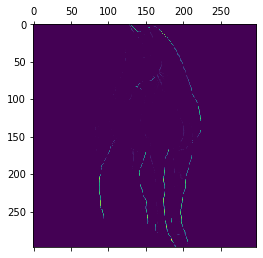

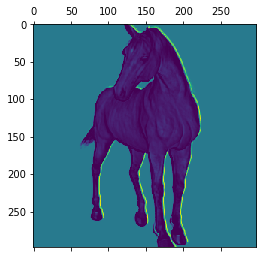

In [43]:
# In thử cho layer đầu tiên
# Getting Activations of first layer
first_layer_activation = activation_maps[0]
  
# shape of first layer activation
print(first_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')

##### Thực hiện visualization cho tất cả Conv và Maxpooling layer

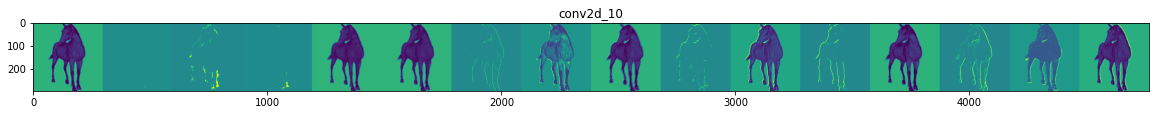

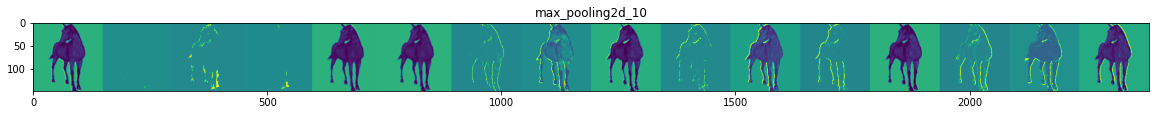

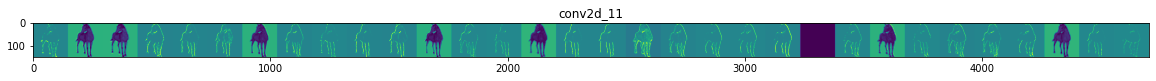

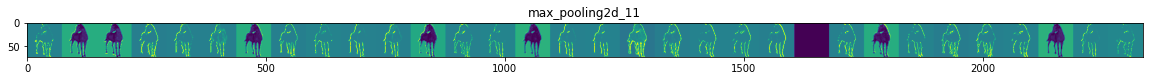

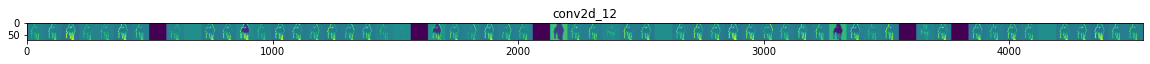

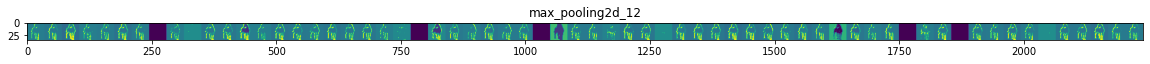

In [46]:
# in ra cho tất cả 8 layer
layer_names = [layer.name for layer in model.layers]

for layer_name, activation_map in zip(layer_names, activation_maps):
    if len(activation_map.shape) == 4:      # chỉ làm cho Conv và maxpooling thôi, thực ra ở trên mình đã giới hạn layer rồi
        # số lượng features
        n_features = activation_map.shape[-1]   # lấy phần tử cuối
        # Activation map có shape (1, size, size, n_features)
        size = activation_map.shape[1]
        display_grid = np.zeros((size, size * n_features))      # để vẽ đủ cho 1 layer, có n_feature x size x size

        # duyệt qua các features
        for i in range(n_features):
            x = activation_map[0, :, :, i]     # i thể hiện số thứ tự của feature, 0 ban đầu là lấy 1 ảnh, : : lấy tất cả size của ảnh
            # Xử lý trước khi hiển thị
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')      # đưa các giá trị về [0, 255]
            display_grid[:, size * i : size * (i + 1)] = x      # hàng không đổi, chỉ chạy theo cột
        
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
